# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [1]:
import pandas as pd
import numpy as np

# Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [2]:
temp = pd.read_csv('./Temp_States.csv')

#### Print `temp`.

In [4]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [5]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [ ]:
"""
We have two strings (City and State) and one field with numeric value / float (Temperature'New)
"""

#### Select the rows where state is New York.

In [7]:
select_rows = temp[temp.State == 'New York']

#### What is the average temperature of cities in New York?

In [9]:
select_rows.Temperature.mean()
# 10.7 degrees Celsius

10.74074074074074

#### Which states and cities have a temperature above 15 degrees Celsius?

In [10]:
temp[temp.Temperature > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [12]:
temp.loc[temp.Temperature > 15, 'City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [14]:
temp.loc[(temp.Temperature > 15) & (temp.Temperature < 20), 'City']

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and standard deviation of the temperature of each state.

In [17]:
temp.groupby('State').Temperature.agg([np.mean, np.std])

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


#  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [26]:
employees = pd.read_csv('./Employees.csv')
print(employees.shape)
employees.head()

(500, 6)


,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52
3,Admin,Master,VP,Manuella,15,33
4,Sales,Master,Analyst,Carla,6,38


#### Explore the data types of the `employees` dataframe. Comment your results.

In [19]:
employees.dtypes

Department    object
Education     object
Title         object
Name          object
Years          int64
Salary         int64
dtype: object

In [ ]:
"""
4 strings (Department, Education, Title, Name) and 2 numeric values / integers (Years, Salary) per record.
"""

#### What's the average salary in this company?

In [22]:
employees.Salary.mean()

73.528

#### What's the highest salary?

In [23]:
employees.Salary.max()

120

#### What's the lowest salary?

In [24]:
employees.Salary.min()

30

#### Who are the employees with the lowest salary?

In [28]:
min_salary = employees.Salary.min()
employees.loc[employees.Salary == min_salary, 'Name']

27         Sean
106        Luke
128        Adam
139        Rick
214        Neil
266      Marcel
452    Augustin
Name: Name, dtype: object

#### Find all the information about an employee called David.

In [29]:
employees.loc[employees.Name == 'David']

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
124,IT,Bachelor,VP,David,3,31


#### Could you return only David's salary?

In [30]:
employees.loc[employees.Name == 'David', 'Salary']

0      58
124    31
Name: Salary, dtype: int64

#### Print all the rows where job title is associate.

In [31]:
employees.loc[employees.Title == 'associate']

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52
7,HR,Master,associate,Carol,14,53
8,Admin,PhD,associate,Jean,8,50
...,...,...,...,...,...,...
477,HR,PhD,associate,Phillip,11,113
486,IT,Bachelor,associate,Jay,14,58
487,HR,Master,associate,Patricia,10,110
491,Admin,PhD,associate,Alice,8,37


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [32]:
# Method 1
employees.head(3)

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52


In [34]:
# Method 2
employees.iloc[:3]

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52


#### Find the employees whose title is associate and whose salary is above 55.

In [36]:
employees.loc[(employees.Title == 'associate') & (employees.Salary > 55)]

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
9,Admin,Master,associate,Kareem,3,104
10,Admin,Master,associate,Cynthia,1,114
16,Admin,Bachelor,associate,Shanon,1,99
18,Admin,Bachelor,associate,Megan,9,79
...,...,...,...,...,...,...
476,Admin,PhD,associate,Greg,8,93
477,HR,PhD,associate,Phillip,11,113
486,IT,Bachelor,associate,Jay,14,58
487,HR,Master,associate,Patricia,10,110


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [37]:
employees.groupby('Years').Salary.mean()

Years
1     75.863636
2     75.857143
3     74.571429
4     77.129032
5     73.857143
6     72.382353
7     73.840000
8     64.250000
9     76.741935
10    73.351351
11    74.866667
12    73.454545
13    71.935484
14    70.968750
15    69.758621
Name: Salary, dtype: float64

####  What is the average salary per title?

In [38]:
employees.groupby('Title').Salary.mean()

Title
Analyst      73.703911
VP           72.907975
associate    73.968354
Name: Salary, dtype: float64

####  Find the salary quartiles.


In [39]:
q1, q2, q3, q4 = np.quantile(employees.Salary, [i * 0.25 for i in range (1, 4+1)])
print(q1, q2, q3, q4)

50.0 72.0 97.0 120.0


In [41]:
employees.describe().T

,count,mean,std,min,25%,50%,75%,max
Years,500.0,7.556,4.465731,1.0,3.0,7.0,11.25,15.0
Salary,500.0,73.528,26.890061,30.0,50.0,72.0,97.00,120.0


#### Is the mean salary different per gender?

In [ ]:
# Maybe so, but we do not have the gender information

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [43]:
employees.describe().T[['min', 'mean', 'max']]

,min,mean,max
Years,1.0,7.556,15.0
Salary,30.0,73.528,120.0


#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [44]:
employees.groupby('Department').Salary.agg(lambda x: max(x) - min(x))

Department
Admin    90
HR       89
IT       90
Sales    90
Name: Salary, dtype: int64

In [45]:
employees.groupby('Department').Salary.agg(lambda x: x.max() - x.min())

Department
Admin    90
HR       89
IT       90
Sales    90
Name: Salary, dtype: int64

# Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [52]:
orders = pd.read_csv('./Orders.csv')
orders.drop('Unnamed: 0', axis = 1, inplace = True)

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [53]:
orders.dtypes

InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [54]:
orders.describe()

,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [55]:
orders.head()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 8:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 8:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 8:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 8:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 8:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
"""
We have 397,924 rows with no missing values / NaN
year only has two values: 2010 and 2011
day seems to be the day of the week, not of the month
Looking at std and max values, we have outliers for Quantity, UnitPrice, and amount_spent
"""

####  What is the average purchase price?

In [56]:
orders.UnitPrice.mean()

3.116174480549152

#### What are the highest and lowest purchase prices? 

In [57]:
orders.UnitPrice.max()

8142.75

In [59]:
orders.UnitPrice.min()

0.0

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [65]:
spanish_customers = orders.loc[orders.Country == 'Spain', 'CustomerID'].unique()

#### How many customers do we have in Spain?

In [66]:
len(spanish_customers)

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [70]:
nb_items_customers = orders.groupby('CustomerID').Quantity.sum()
fifty_items_customers = nb_items_customers[nb_items_customers > 50].index
fifty_items_customers

Int64Index([12346, 12347, 12348, 12349, 12350, 12352, 12354, 12355, 12356,
            12357,
            ...
            18272, 18273, 18274, 18276, 18277, 18278, 18281, 18282, 18283,
            18287],
           dtype='int64', name='CustomerID', length=4091)

#### Select orders from Spain that include more than 50 items.

In [74]:
orders.loc[(orders.Country == 'Spain') & (orders.Quantity > 50)]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders.

In [75]:
orders.loc[orders.amount_spent == 0]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [76]:
orders.loc[orders.Description.str.startswith('lunch bag')]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 9:37:00,1.65,14688,United Kingdom,16.50
172,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 9:56:00,1.65,17420,United Kingdom,16.50
354,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 9:38:00,1.65,17001,United Kingdom,16.50
397713,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all `lunch bag` orders made in 2011.

In [77]:
orders.loc[(orders.Description.str.startswith('lunch bag')) & (orders.year == 2011)]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 9:38:00,1.65,17001,United Kingdom,16.50
397713,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 200.0)

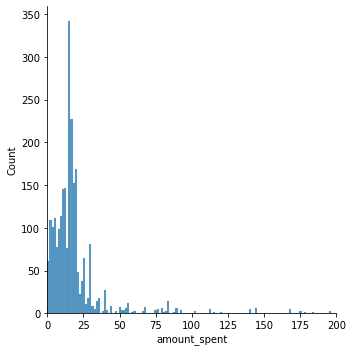

In [88]:
sns.displot(orders.loc[orders.Country == 'Spain', 'amount_spent'])
plt.xlim(0, 200)

#### Select all orders made in the month of August.

In [90]:
orders.loc[orders.month == 8]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 8:30:00,1.45,17941,United Kingdom,139.20
199476,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 8:30:00,1.06,17941,United Kingdom,165.36
199477,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 9:31:00,0.85,14947,United Kingdom,20.40
199478,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 9:31:00,0.95,14947,United Kingdom,11.40
199479,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 9:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [91]:
orders.loc[orders.month == 8, 'Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country?

In [92]:
orders.groupby('Country').amount_spent.mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [93]:
orders.loc[orders.UnitPrice == orders.UnitPrice.max()]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What is the average amount spent per year?

In [94]:
orders.groupby('year').amount_spent.mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64